# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 2: Linear and k-NN Regression


**Harvard University**<br/>
**Fall 2019**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner

<hr style="height:2pt">


In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.
- Restart the kernel and run the whole notebook again before you submit. 
- Please use .head() when viewing data. Do not submit a notebook that is excessively long because output was not suppressed.

<hr style="height:2pt">

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

## <div class="theme">  <b>Predicting Taxi Pickups in NYC</b> </div>

In this homework, we will explore k-nearest neighbor and linear regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in the file `nyc_taxi.csv`.  You will need to separate it into training and test sets. The first column contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded in NYC during Jan 2015.

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pickups at that time. The models will be fitted to the training set and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric.

### <div class="exercise"> <b> Question 1  [20 pts]</b> </div>

**1.1**. Use pandas to load the dataset from the csv file `nyc_taxi.csv` into a pandas data frame.  Use the `train_test_split` method from `sklearn` with a `random_state` of 42 and a `test_size` of 0.2 to split the dataset into training and test sets.  Store your train set data frame as `train_data` and your test set data frame as `test_data`.

**1.2**. Generate a scatter plot of the training data points with clear labels on the x and y axes to demonstrate how the number of taxi pickups is dependent on the time of the day.  Be sure to title your plot.

**1.3**. In a few sentences, describe the general pattern of taxi pickups over the course of the day and explain why this is a reasonable result. 

**1.4**. You should see a *hole* in the scatter plot when `TimeMin` is 500-550 minutes and `PickupCount` is roughly 20-30 pickups.  Briefly surmise why this may be the case.  This will not be graded harshly, we just want you to think and communicate about the cause.


### Answers

**1.1 Use pandas to load the dataset from the csv file ...**

In [3]:
# your code here
taxi = pd.read_csv("data/nyc_taxi.csv")
train_data, test_data = train_test_split(taxi, random_state=42, test_size=0.2)
taxi.head()

,TimeMin,PickupCount
0,860.0,33.0
1,17.0,75.0
2,486.0,13.0
3,300.0,5.0
4,385.0,10.0


**1.2 Generate a scatter plot of the training data points**


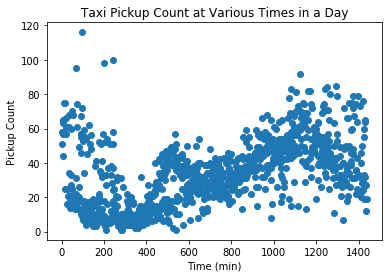

In [34]:
# your code here
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(train_data["TimeMin"], train_data["PickupCount"], label="Observations")
ax.set_xlabel("Time (min)")
ax.set_ylabel("Pickup Count")
ax.set_title("Taxi Pickup Count at Various Times in a Day");


**1.3 In a few sentences, describe the general pattern of taxi pickups over the course of the day and explain why this is a reasonable result.**

Except for a few outliers, the pickup count for 0-400 minutes is very low (less than 20).
This is due to early hours (12 - 7am) where people are not active yet.

Pickup counts start to rise during 400 to 1100 minutes, ranging from (8am to 6pm). The peak is at 6pm due to people rushing home after their day.

Pickup counts drop until 1400 minutes as night falls and people are resting.

**1.4 You should see a *hole* in the scatter plot when `TimeMin` is 500-550 minutes...**

During the weekend, people don't have to go anywhere early in the morning (8 - 9am) which gives a low pickup count (<20).

The high pickup count (>30) is due to the weekday when people have to wake up early to go somewhere.

There is little "medium" pickup (20-30) count which explains the hole. Either a lot of people are active at that time or very little.

<hr>

### <div class="exercise"> <b>Question 2 [25 pts]</b> </div>

In lecture we've seen k-Nearest Neighbors (k-NN) Regression, a non-parametric regression technique.  In the following problems please use built in functionality from `sklearn` to run k-NN Regression. 


**2.1**. Choose `TimeMin` as your feature variable and `PickupCount` as your response variable.  Create a dictionary of `KNeighborsRegressor` objects and call it `KNNModels`.  Let the key for your `KNNmodels` dictionary be the value of $k$ and the value be the corresponding `KNeighborsRegressor` object. For $k \in \{1, 10, 75, 250, 500, 750, 1000\}$, fit k-NN regressor models on the training set (`train_data`). 

**2.2**.  For each $k$, overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` in the training set with a scatter plot of **predictions** for `PickupCount` vs  `TimeMin`.  Do the same for the test set.  You should have one figure with 7 x 2 total subplots; for each $k$ the figure should have two subplots, one subplot for the training set and one for the test set. 

**Hints**:
1. Each subplot should use different color and/or markers to distinguish k-NN regression prediction values from the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  


**2.3**. Report the $R^2$ score for the fitted models on both the training and test sets for each $k$ (reporting the values in tabular form is encouraged).

**2.4**. Plot, in a single figure, the $R^2$ values from the model on the training and test set as a function of $k$.  

**Hints**:
1. Again, the figure must have axis labels and a legend.
2. Differentiate $R^2$ plots on the training and test set by color and/or marker.
3. Make sure the $k$ values are sorted before making your plot.

**2.5**. Discuss the results:

1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  
2. What does an $R^2$ score of $0$ mean?  
3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?
4. Do the training and test $R^2$ plots exhibit different trends?  Describe.  
5. What is the best value of $k$?  How did you come to choose this value?  How do the corresponding training/test set $R^2$ values compare?
6. Use the plots of the predictions (in 2.2) to justify why your choice of the best $k$ makes sense (**Hint**: think Goldilocks).

### Answers

**2.1 Choose `TimeMin` as your feature variable and `PickupCount` as your response variable.  Create a dictionary...** 

In [36]:
# your code here
KNNModels = {}
for k in [1,10,75,250,500,750,1000]:
    temp = KNeighborsRegressor(n_neighbors=k)
    temp.fit(train_data["TimeMin"][:, None], train_data["PickupCount"])
    KNNModels[k] = temp

**2.2  For each $k$, overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` in the training set...**

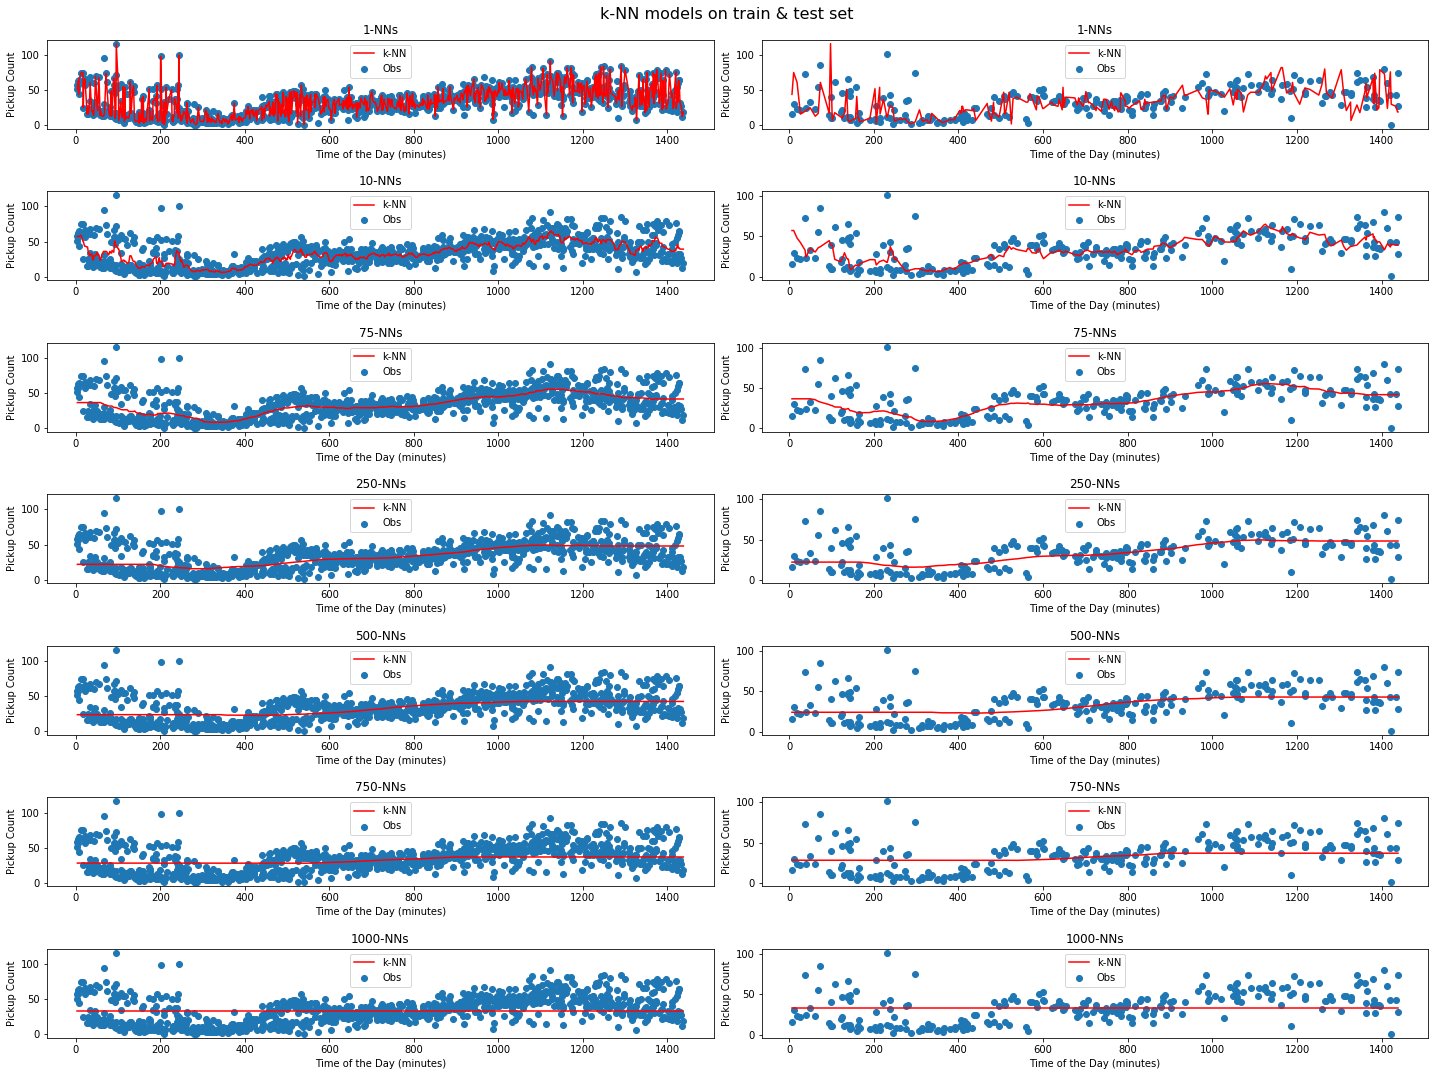

In [89]:
# your code here 
nc = 2
fig, axes = plt.subplots(nrows=7, ncols=nc, figsize=(20,15))
fig.suptitle("k-NN models on train & test set", fontsize=16)
fig.tight_layout()  # remove extra space between suptitle and subplots
# 1st arg ensures suptitle not inside 1st subplot; 2nd ensures x-axis does not touch subplot title
fig.subplots_adjust(top=0.95, hspace=0.7)  

ks = [1,10,75,250,500,750,1000]
sorted_train = train_data.sort_values(['TimeMin'])
sorted_test = test_data.sort_values(['TimeMin'])
sorted_data = [sorted_train, sorted_test]


for i in range(len(ks)):
    for j in range(len(sorted_data)):
        axes[i][j].scatter(sorted_data[j]["TimeMin"], sorted_data[j]["PickupCount"], label="Obs")
        pred = KNNModels[ks[i]].predict(sorted_data[j]["TimeMin"][:, None])
        axes[i][j].plot(sorted_data[j]["TimeMin"], pred, 'r', label='k-NN')
        axes[i][j].set_xlabel("Time of the Day (minutes)")
        axes[i][j].set_ylabel("Pickup Count")
        axes[i][j].set_title(f"{ks[i]}-NNs")
        axes[i][j].legend()

**2.3 Report the $R^2$ score for the fitted models on both the training and test sets for each $k$ (reporting the values in tabular form is encouraged).**


In [114]:
# your code here
r2_trains = []
r2_tests = []

for i in range(len(ks)):
    r2_train = KNNModels[ks[i]].score(train_data["TimeMin"][:,None], train_data["PickupCount"])
    r2_test = KNNModels[ks[i]].score(test_data["TimeMin"][:,None], test_data["PickupCount"])
    r2_trains.append(r2_train)
    r2_tests.append(r2_test)
    
cols = ["k-Nearest Neighbours", r"$R^2$ train score", r"$R^2$ test score"]
pd.DataFrame(np.array([ks, r2_trains, r2_tests]).T, columns=cols)

,k-Nearest Neighbours,$R^2$ train score,$R^2$ test score
0,1.0,0.712336,-0.418932
1,10.0,0.509825,0.272068
2,75.0,0.445392,0.390310
3,250.0,0.355314,0.340341
4,500.0,0.290327,0.270321
5,750.0,0.179434,0.164909
6,1000.0,0.000000,-0.000384


**2.4 Plot, in a single figure, the $R^2$ values from the model on the training and test set as a function of $k$.**  

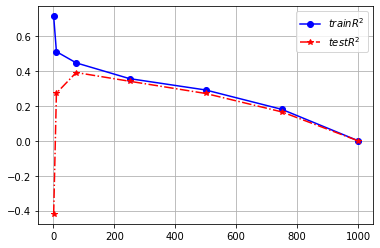

In [111]:
# your code here
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(ks, r2_trains, 'bo-', label=r'$train R^2$')
ax.plot(ks, r2_tests, 'r*-.', label=r'$test R^2$')
ax.legend()
ax.grid()

**2.5 Discuss the results:**

1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  

*Answer:* The output is always the average of all data points

2. What does an $R^2$ score of $0$ mean?  

*Answer:* The model's score is just as good as using the average of all data points

3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?

*Answer:* It means the model is worse than using the average of all data points. Using 1-NN results in negative test $R^2$ score

4. Do the training and test $R^2$ plots exhibit different trends?  Describe.  

*Answer:* Yes, training $R^2$ score decreases as $k$ increases. For test $R^2$ score, it increases and peaks at $k=75$, then decreases. For large $k$s, both the train and test $R^2$ score are similar.

5. What is the best value of $k$?  How did you come to choose this value?  How do the corresponding training/test set $R^2$ values compare?

*Answer:* $k=75$ as it has the highest test $R^2$ score. It's training score is higher than it's test score.

6. Use the plots of the predictions (in 2.2) to justify why your choice of the best $k$ makes sense (**Hint**: think Goldilocks).** ****

*Answer:* $k=75$ may not have the best training score, but it has the best test score which is what we care about (ie. the model should generalise well to new, unseen data). It also fits the shape of the data.

<hr>

### <div class="exercise"> <b> Question 3 [25 pts] </b></div>

We next consider simple linear regression, which we know from lecture is a parametric approach for regression that assumes that the response variable has a linear relationship with the predictor.  Use the `statsmodels` module for Linear Regression. This module has built-in functions to summarize the results of regression and to compute confidence intervals for estimated regression parameters.  

**3.1**. Again choose `TimeMin` as your predictor and `PickupCount` as your response variable.  Create an `OLS` class instance and use it to fit a Linear Regression model on the training set (`train_data`).  Store your fitted model in the variable `OLSModel`.

**3.2**. Create a plot just like you did in 2.2 (but with fewer subplots): plot both the observed values and the predictions from `OLSModel` on the training and test set. You should have one figure with two subplots, one subplot for the training set and one for the test set.

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  


**3.3**. Report the $R^2$ score for the fitted model on both the training and test sets.

**3.4**. Report the estimates for the slope and intercept for the fitted linear model.  

**3.5**. Report the $95\%$ confidence intervals (CIs) for the slope and intercept.  

**3.6**. Discuss the results:

1. How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?  Describe why this is not surprising for these data.
2. What does the sign of the slope of the fitted linear model convey about the data?  
3. Interpret the $95\%$ confidence intervals from 3.5.  Based on these CIs is there evidence to suggest that the number of taxi pickups has a significant linear relationship with time of day?  How do you know? 
4. How would $99\%$ confidence intervals for the slope and intercept compare to the $95\%$ confidence intervals (in terms of midpoint and width)?  Briefly explain your answer.  
5. Based on the data structure, what restriction on the model would you put at the endpoints (at $x\approx0$ and $x\approx1440$)?   What does this say about the appropriateness of a linear model?


### Answers

**3.1 Again choose `TimeMin` as your predictor and `PickupCount` as your response variable...**

In [4]:
# your code here
model = OLS(train_data["PickupCount"], sm.add_constant(train_data["TimeMin"]))
results = model.fit()
print(results.params)

const      16.750601
TimeMin     0.023335
dtype: float64


/home/dev15/anaconda3/envs/pandai/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


**3.2 Create a plot just like you did in 2.2 (but with fewer subplots)...** 

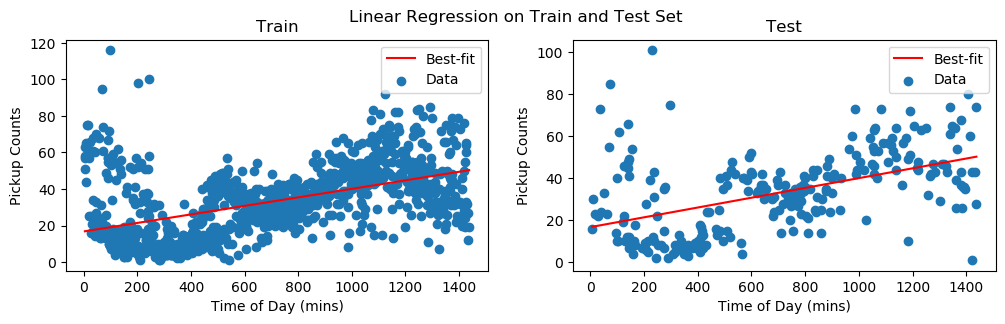

In [29]:
# your code here

plt.rcdefaults()
fig, ax = plt.subplots(1, 2, figsize=(12,3))
fig.subplots_adjust(wspace=0.2) 
fig.suptitle("Linear Regression on Train and Test Set")

ax[0].scatter(train_data["TimeMin"], train_data["PickupCount"], label='Data')
train_x = np.linspace(train_data["TimeMin"].min(), train_data["TimeMin"].max(), 100)
train_pred = model.predict(results.params, exog=sm.add_constant(train_x))
ax[0].plot(train_x, train_pred, 'r', label='Best-fit')
ax[0].set_ylabel("Pickup Counts")
ax[0].set_xlabel("Time of Day (mins)")
ax[0].set_title("Train")
ax[0].legend()

ax[1].scatter(test_data["TimeMin"], test_data["PickupCount"], label='Data')
test_x = np.linspace(test_data["TimeMin"].min(), test_data["TimeMin"].max(), 100)
test_pred = model.predict(results.params, exog=sm.add_constant(test_x))
ax[1].plot(test_x, test_pred, 'r', label='Best-fit')
ax[1].set_ylabel("Pickup Counts")
ax[1].set_xlabel("Time of Day (mins)")
ax[1].set_title("Test")
ax[1].legend()

**3.3 Report the $R^2$ score for the fitted model on both the training and test sets.**


In [36]:
r2_test = r2_score(test_data["PickupCount"], model.predict(results.params, exog=sm.add_constant(test_data["TimeMin"])))
r2_train = r2_score(train_data["PickupCount"], model.predict(results.params, exog=sm.add_constant(train_data["TimeMin"])))
print(f'Train R^2 Score: {r2_train} \t Test R^2 Score: {r2_test}')

Train R^2 Score: 0.24302603531893352 	 Test R^2 Score: 0.240661535615741


/home/dev15/anaconda3/envs/pandai/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/dev15/anaconda3/envs/pandai/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


**3.4 Report the estimates for the slope and intercept for the fitted linear model.**

In [37]:
# your code here
print(f'Slope: {results.params[1]} \t Intercept: {results.params[0]}')

Slope: 0.023335175692397344 	 Intercept: 16.750601427446817


**3.5 Report the $95\%$ confidence intervals (CIs) for the slope and intercept.** 


In [48]:
# your code here
print(f'CI: {results.conf_int(0.05)}')

CI:                  0          1
const    14.675141  18.826062
TimeMin   0.020777   0.025893


**3.6 Discuss the results:**

1. How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?  Describe why this is not surprising for these data.

*Answer:* the LR test $R^2$ is lower than the best test $R^2$ from k-NN. Reason being the data is not linear in the first place.

2. What does the sign of the slope of the fitted linear model convey about the data?  

*Answer:* Positive slope indicates the pickup count increases as the time of the day increases.


3. Interpret the $95\%$ confidence intervals from 3.5.  Based on these CIs is there evidence to suggest that the number of taxi pickups has a significant linear relationship with time of day?  How do you know? 


*Answer:* Yes, because both the lower and upper limit of the slope's CI are positive. If the CI contains 0, then there is a chance the true slope is 0, which means no significant linear relationship (a flat line means pickup does not depend on day of time)


4. How would $99\%$ confidence intervals for the slope and intercept compare to the $95\%$ confidence intervals (in terms of midpoint and width)?  Briefly explain your answer.  


In [49]:
print(f'CI: {results.conf_int(0.01)}')

# midpoints
print(results.conf_int(0.05).loc['const'].mean(), results.conf_int(0.01).loc['const'].mean())
print(results.conf_int(0.05).loc['TimeMin'].mean(), results.conf_int(0.01).loc['TimeMin'].mean())

CI:                  0         1
const    14.021073  19.48013
TimeMin   0.019971   0.02670
16.750601427446817 16.750601427446817
0.023335175692397344 0.023335175692397344


*Answer:* The widths are wider with 99% CI. Their midpoints are the same. Midpoints should be same since the predicted slope and intercept are at the centre of the Normal distribution. Widths increase since if we are more confident, we would specify a wider range so that it is more likely to capture the true value.

5. Based on the data structure, what restriction on the model would you put at the endpoints (at $x\approx0$ and $x\approx1440$)?   What does this say about the appropriateness of a linear model?

*Answer:* 0 and 1440 are actually the same times of a day. However, they contain different values if we use the best-fit line. If we make them to have the same value, the linear model would have a slope of 0. This means a linear model is not appropriate for this data.

<hr>

## <div class="theme"> Outliers </div>

You may recall from lectures that OLS Linear Regression can be susceptible to outliers in the data.  We're going to look at a dataset that includes some outliers and get a sense for how that affects modeling data with Linear Regression.  **Note, this is an open-ended question, there is not one correct solution (or even one correct definition of an outlier).**


### <div class="exercise"><b> Question 4 [30 pts] </b></div>




**4.1**. We've provided you with two files `outliers_train.csv` and `outliers_test.csv` corresponding to training set and test set data.  What does a visual inspection of training set tell you about the existence of potential outliers in the data?

**4.2**. Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create a Linear Regression model on the training set data.  Store your model in the variable `OutlierOLSModel`.

**4.3**. You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?

**4.4**  Construct an approximate algorithm to find a user-specified number of outlier candidates in the training data. Place your algorithm in the function `find_outliers_simple`.  It should take the parameters `dataset_x`, `dataset_y`, and `num_outliers` representing your features, response variable values (make sure your response variable is stored as a numpy column vector), and the number of outliers to remove.  Your algorithm should select the `num_outliers` most extreme residuals from the linear regression model to predict, `dataset_y` from `dataset_x`.  The return value should be a list `outlier_indices` representing the indices of the `num_outliers` outliers in the original datasets you passed in.  Apply your function to the training data in order to identify 3 outliers.  Use `statsmodels` to create a Linear Regression model on the remaining training set data (with the 3 outliers removed), and store your model in the variable `OutlierFreeSimpleModel`.

**4.5** Create a figure with two subplots: the first is a scatterplot where the color of the points denotes the outliers from the non-outliers in the training set, and include two regression lines on this scatterplot: one fitted with the outliers included and one fitted with the outlier removed (all on the training set).  The second plot should include a scatterplot of points from the test set with the same two regression lines fitted on the training set: with and without outliers.  Visually which model fits the test set data more closely?

**4.6**. Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?

**4.7**. One potential problem with the brute force outlier detection approach in 4.3 and the heuristic algorithm you constructed 4.4 is that they assume prior knowledge of the number of outliers.  In general you can't expect to know ahead of time the number of outliers in your dataset.  Propose how you would alter and/or use the algorithm you constructed in 4.4 to create a more general heuristic (i.e. one which doesn't presuppose the number of outliers) for finding outliers in your dataset.  

**Hints**:
   1. Should outliers be removed one at a time or in batches?
   2. What metric would you use and how would you use it to determine how many outliers to consider removing?

### Answers
**4.1  We've provided you with two files `outliers_train.txt` and `outliers_test.txt` corresponding to training set and test set data.  What does a visual inspection of training set tell you about the existence of outliers in the data?** 

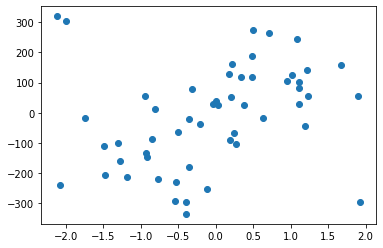

In [9]:
train_out = pd.read_csv("data/outliers_train.csv")
train_out.head()
fig, ax = plt.subplots(1, 1)
ax.scatter(train_out['X'], train_out['Y'])

*Answer:* The data looks mostly linear, but the top-left and bottom-right areas of the plot contain some outliers.

**4.2 Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create a Linear Regression model on the training set data.  Store your model in the variable `OutlierOLSModel`.**



In [10]:
# your code here
OutlierOLSModel = OLS(train_out["Y"], sm.add_constant(train_out["X"]))

/home/dev15/anaconda3/envs/pandai/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


**4.3 You're given the knowledge ahead of time that there are 3 outliers...Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?**
  

In [15]:
n_train = len(train_out)
from scipy.special import comb
comb(n_train, n_train - 3)

23426.0

*Answer:* Let us try the brute-force method of removing 3 points from the training set and get the $R^2$ score each time. The 3 outliers can be determined by picking the set of points with maximum score. To do this, we would need $\binom{n}{n-3} = \frac{n!}{3!(n-3)!} = 23426 $

**4.4  Construct an approximate algorithm to find a user-specified number of outlier candidates in the training data...**

In [48]:
def find_outliers_simple(dataset_x, dataset_y, num_outliers):
    line = OLS(dataset_y, sm.add_constant(dataset_x))
    results = line.fit()
    return list(np.argsort(np.abs(np.array(results.resid)))[-num_outliers:])

outlier_indices = find_outliers_simple(train_out["Y"], train_out["X"], 3)
OutlierFreeSimpleModel = OLS(train_out.drop(outlier_indices)["Y"],
                             sm.add_constant(train_out.drop(outlier_indices)["X"]))

/home/dev15/anaconda3/envs/pandai/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


**4.5 Create a figure with two subplots: the first is a scatterplot where the color of the points...**


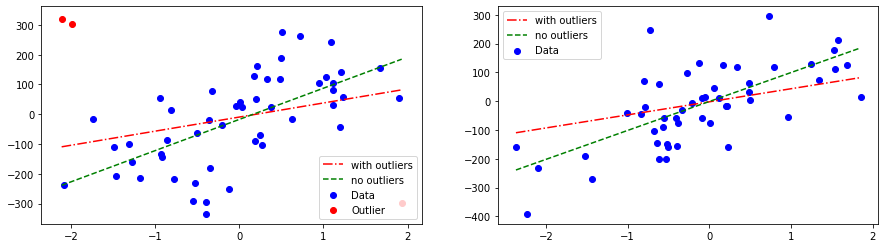

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(15,4))
fig.subplots_adjust(wspace=0.2) 

ax[0].scatter(train_out.drop(outlier_indices)["X"], train_out.drop(outlier_indices)["Y"], c='b', label="Data")
ax[0].scatter(train_out.iloc[outlier_indices]["X"], train_out.iloc[outlier_indices]["Y"], c='r', label="Outlier")

x = np.linspace(train_out['X'].min(), train_out['X'].max(), 100)
no_outlier = OutlierFreeSimpleModel.predict(OutlierFreeSimpleModel.fit().params, exog=sm.add_constant(x))
outlier = OutlierOLSModel.predict(OutlierOLSModel.fit().params, exog=sm.add_constant(x))

ax[0].plot(x, outlier, 'r-.', label="with outliers")
ax[0].plot(x, no_outlier, 'g--', label="no outliers")
ax[0].legend(loc='best')

test_out = pd.read_csv("data/outliers_test.csv")
x = np.linspace(test_out['X'].min(), test_out['X'].max(), 100)
ax[1].scatter(test_out["X"], test_out["Y"], c='b', label="Data")
ax[1].plot(x, outlier, 'r-.', label="with outliers")
ax[1].plot(x, no_outlier, 'g--', label="no outliers")
ax[1].legend(loc='best')

*Answer:* Both look OK to me.

**4.6 Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?**


In [78]:
# your code here
y_out = OutlierOLSModel.predict(OutlierOLSModel.fit().params, exog=sm.add_constant(test_out['X']))
y_no_out = OutlierFreeSimpleModel.predict(OutlierFreeSimpleModel.fit().params, exog=sm.add_constant(test_out['X']))

print(r2_score(y_out, test_out["Y"]), r2_score(y_no_out, test_out["Y"]))

-4.997950916467584 -0.015487406847402019


/home/dev15/anaconda3/envs/pandai/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


*Answer:* `OutlierFreeSimpleModel` has the better score

**4.7 One potential problem with the brute force outlier detection approach in 4.3 and the heuristic algorithm you constructed 4.4 is that they assume prior knowledge of the number of outliers...**

*Answer:* I would iteratively remove batches of outliers. At each iteration, I would first fit a linear model and calculate the residuals. Then remove the points with residual greater than two standard deviations of the average residual. Repeat until there are no points that are removable.